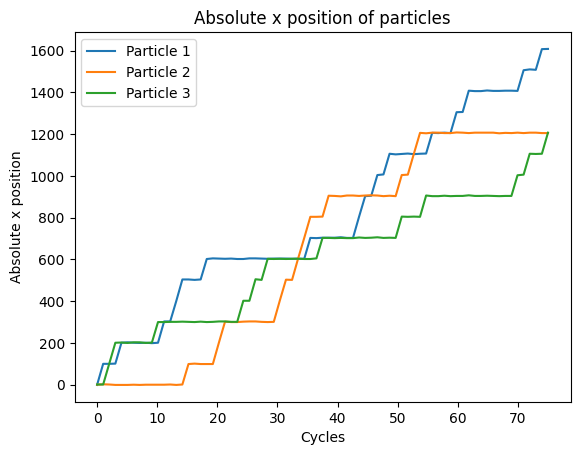

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Particle:
    def __init__(self, potentialFunction, betak, id):
        self.id = id
        self.xPos = 0
        self.time = 0
        self.absxPos = 0
        self.sawtoothPotetial = potentialFunction
        self.constantPotetial = lambda x: 1
        self.activePotetial = self.constantPotetial
        self.betak = betak

    def pPlus(self):
        return 1 / (1 + np.exp(-self.betak * (self.activePotetial(self.xPos - 1)
                                               - self.activePotetial(self.xPos + 1))) 
                    + np.exp(-self.betak * (self.activePotetial(self.xPos)
                                             - self.activePotetial(self.xPos + 1))))
    
    def pMinus(self):
        return 1 / (1 + np.exp(-self.betak * (self.activePotetial(self.xPos + 1)
                                               - self.activePotetial(self.xPos - 1))) 
                    + np.exp(-self.betak * (self.activePotetial(self.xPos)
                                             - self.activePotetial(self.xPos - 1))))

    def potentialSwitch(self):
        if self.activePotetial == self.constantPotetial:
            self.activePotetial = self.sawtoothPotetial
        else:
            self.activePotetial = self.constantPotetial

    def walkStep(self, T_p):
        self.time += 1

        if self.time % T_p == 0: # every 200 time steps switch potential
            self.potentialSwitch()
        
        prob = random.uniform(0, 1)
        if prob <= self.pMinus():
            self.xPos -= 1
            self.absxPos -= 1
            if self.xPos < -100:
                self.xPos = 100

        elif prob > 1 - self.pPlus():
            self.xPos += 1
            self.absxPos += 1
            if self.xPos > 100:
                self.xPos = -100
        
    def getPosition(self):
        return self.xPos
    
    def getProbebility(self):
        return float(self.pMinus()), float(1 - (self.pPlus() + self.pMinus())), float(self.pPlus())

    def __str__(self):
        return f"{self.id + 1}"

def sawtoothPotential(x): # can only get values between -100 and 100
    if x < -90 and x >= -100:
        return k * x / (alpha * N_x) + k*10
    elif x < 0 and x >= -90:
        return - k * x / ((1 - alpha) * N_x)
    elif x < 10 and x >= 0:
        return k * x / (alpha * N_x)
    elif x <= 100 and x >= 10:
        return - k * x / ((1 - alpha) * N_x) + k*10 / 9
    else:
        return False

T_p = 200 # time steps per time interval
N_p = 3 # number of particles
N_x = 100 # steps per potetial period
beta_k = 1000
cycles = 75
timeSteps = cycles * 2 * T_p
alpha = 0.1
k = 1

Particles = [Particle(sawtoothPotential, beta_k, i) for i, _ in enumerate(range(N_p))]
ParticlesAbsPos = [[] for _ in range(N_p)] # [[], [], []]
for i, particle in enumerate(Particles): # simulates all particles
    for _ in range(timeSteps): # run walkstep (simulation) for all timesteps 
        particle.walkStep(T_p)
        ParticlesAbsPos[i].append(particle.absxPos)


for i, Pos in enumerate(ParticlesAbsPos):
    AbsolutePosAxis = np.linspace(0, len(Pos[::400]), len(Pos[::400]))
    plt.plot(AbsolutePosAxis, Pos[::400], markersize=1, label=f"Particle {i + 1}")

plt.title("Absolute x position of particles")
plt.xlabel(f"Cycles")
plt.ylabel("Absolute x position")
plt.legend()
plt.show()



# plt.xticks(np.arange(0, cycles, 1))
# plt.gca().set_xticklabels([])
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

We observe a trend where each particle tend to move towards the right. This models the physical phenomena of a motor protein traversing along the cytoskeleton of a cell. Each particle represents a arbitrary motor protein, while the two potentials is a model of two different energy landscapes where the motor protein may exist in.

- The constant potential describes a landscape in which the particle is in a diffused state. This describes a unbound state dominated by thermal energy. As a result, the movements of the particle is dominated by brownian motion, as it was described in the previous exercise. Thus, in this constant energy landscape, the particle is unbiased towards movement in any direction. In a physical sense, this models the motor protein being free to explore its surroundings. 

- This is in contrast to the particle being in the sawtooth potential. Physically, this represents the motor protein traversing a set direction in a bound state. The movement in this energy landscape is largely determined by the potential gradient, as the asymetric lanscape creates bias towards a bias towards a certain direction. This directed movement is often the effect of the motor protein exploiting the energy from ATP to drive its movement. 